In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time as time
from matplotlib import rc

In [87]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
# rcParams['font.family'] = 'Lucida Bright'
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## Import dataframe (1D)

In [6]:
# work_path = "../../../SWASH/Output/"
# project_name = "Eastbourne_1D_01"

# df1 = pd.read_csv(work_path+project_name+"/"+project_name+"_loc1_gr.tbl",sep='\s+',skiprows=4,usecols=[0,1,2,3,4,5])
# df1 = df1.rename(columns={df1.columns[0]: df1.columns[1], df1.columns[1]: df1.columns[2], df1.columns[2]: df1.columns[3], df1.columns[3]: df1.columns[4], df1.columns[4]: df1.columns[5], df1.columns[5]:'delete'})
# df1 = df1.drop([0,1])
# df1 = df1.drop(columns='delete')

j = 0 # scenario -1
# for i in range(3):
i = 0 # loc -1
project_name = "Scenario_"+str(j+1)
file_name = "Eastbourne_1D_01"+"_loc"+str(i+1)+"_gr_20.tbl"
work_path = "../../Schenarios/"+project_name+"/SWASH/Output/"+file_name

head = (pd.read_csv(work_path, sep='\s+',skiprows=4)).columns[1:]
df1 = pd.read_csv(work_path, sep='\s+',skiprows=7, names= head)

C:\Users\ianmu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Plot function

In [7]:
def plot_f(frame,i,save=False,plot=False,ylim =[-11, 8]):
    h = np.asarray(df1.Watlev.iloc[i*(dyinp+1):(i+1)*(dyinp+1)],float)
    plt.figure(figsize=[15,4])
    h[h < -50] = np.nan
    plt.plot(x+0.5,h)
    plt.plot(x,b)
    plt.ylim(ylim)
    plt.xlabel("x [m]")
    plt.ylabel('z [m]')
    plt.title("Elevation wave at t=" + str(int(t_fil[i])) + 's')
#     plt.plot([1504,1504],[3,-3])
    plt.grid()
    if (save == True):
        if (frame+1<10):
            plt.savefig('../../Schenarios/Scenario_1/SWASH/Processed/mu_f/h_ts=000'+str(frame+1))
        else:
            if (frame+1>=100):
                if (frame+1>=1000):
                    plt.savefig('../../Schenarios/Scenario_1/SWASH/Processed/mu_f/h_ts='+str(frame+1))
                else:
                    plt.savefig('../../Schenarios/Scenario_1/SWASH/Processed/mu_f/h_ts=0'+str(frame+1))
            else:
                plt.savefig('../../Schenarios/Scenario_1/SWASH/Processed/mu_f/h_ts=00'+str(frame+1))
    if (plot == True):
        plt.show()
    else:
        plt.close()

## Define variables

In [9]:
dyinp = [1250 , 1250, 1250][i]
using_y_dir = False

# t_fil = np.asarray(list(dict.fromkeys(df1.Time)),float)
# for i in range(int(np.round(np.max(t_fil)/100))):
#     t_fil[t_fil > (i+1)*60] = t_fil[t_fil > (i+1)*60] - 40
t_fil = np.asarray(list(dict.fromkeys(df1.Tsec,float)))
dt_min = 1# round(t_fil[-1] - t_fil[-2],10)

if (using_y_dir == True):
    x = np.asarray(df1.Yp.iloc[:dyinp+1],float)
else:
    x = np.asarray(df1.Xp.iloc[:dyinp+1],float)
b = -np.asarray(df1.Botlev.iloc[:dyinp+1],float)
d = -np.asarray(df1.Depth.iloc[:dyinp+1],float)

## plot input values

In [48]:
fac = 1/2500
plot = True
save = False
vid_fps = 15

n = int(round((np.max(t_fil)-np.min(t_fil)) / dt_min))
n_ = int(round(n*fac))
fac_ = n_/n

print("Amount of frames outputted:",n_,'of',n)
print("dt:", round(np.max(t_fil)/n_,2),'s')
print("t_vid: ",round(n_/vid_fps,2),'s')
print('Acceleration factor:', round(np.max(t_fil)/(n_/vid_fps),2))
print('Estimated calculation time (assuming save=True while plot=False):',round((n_/2.25)/60,2),'min')

Amount of frames outputted: 3 of 7200
dt: 2700.0 s
t_vid:  0.2 s
Acceleration factor: 40500.0
Estimated calculation time (assuming save=True while plot=False): 0.02 min


## Start plot

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


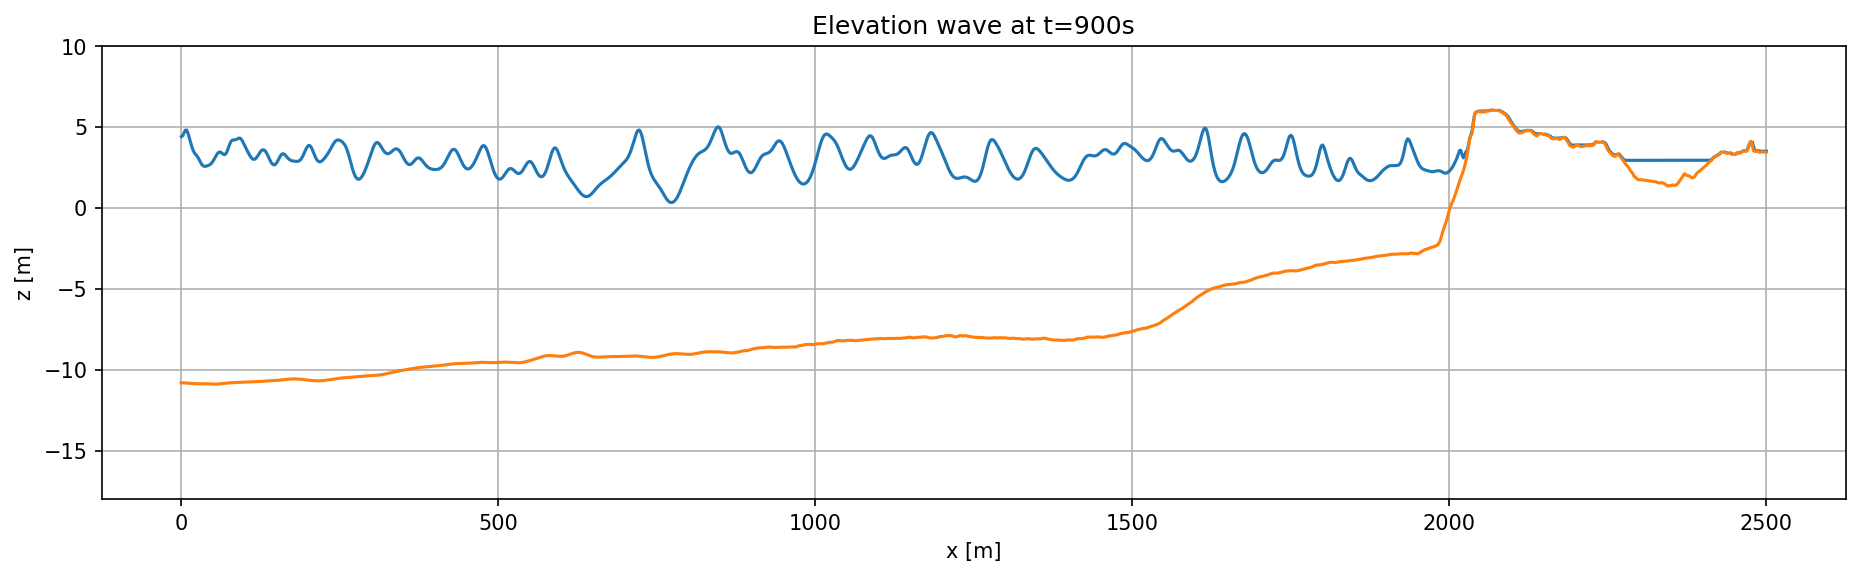

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


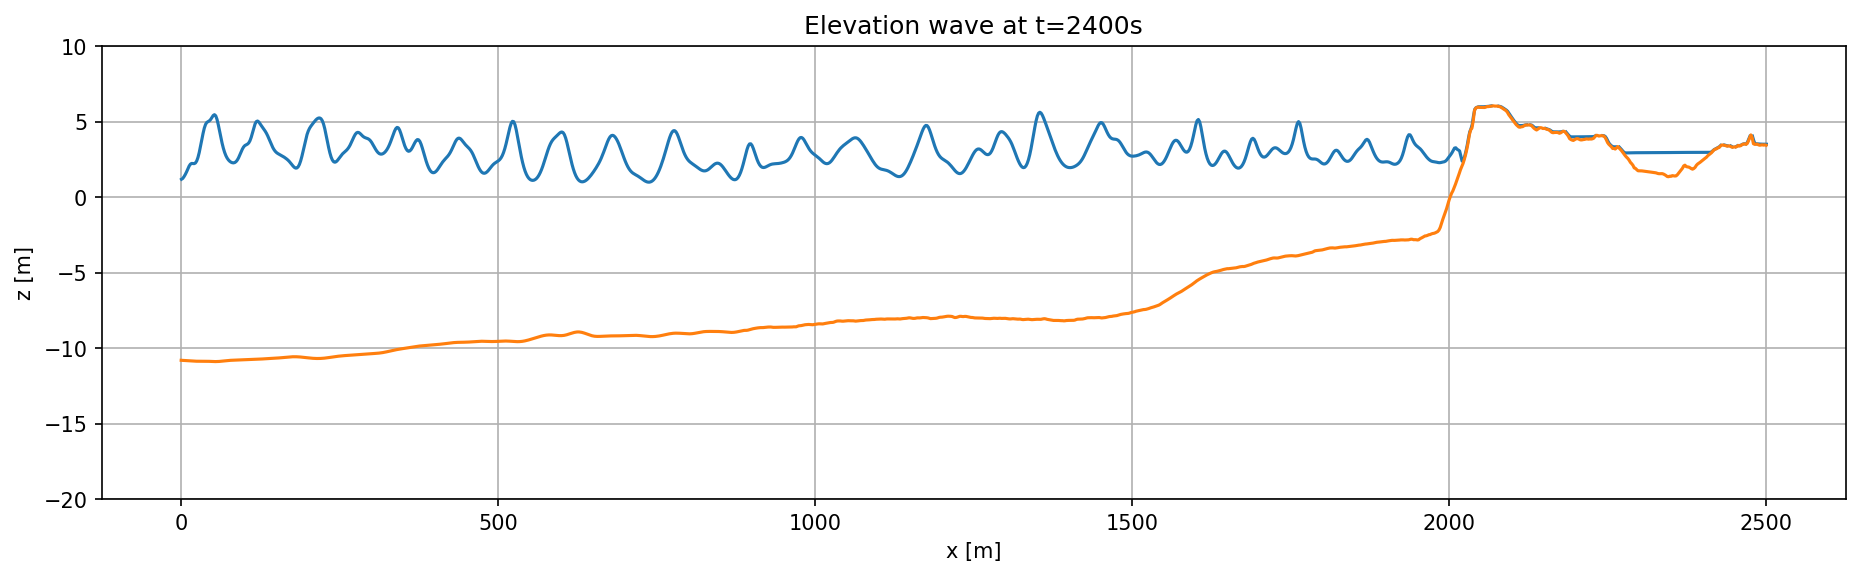

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


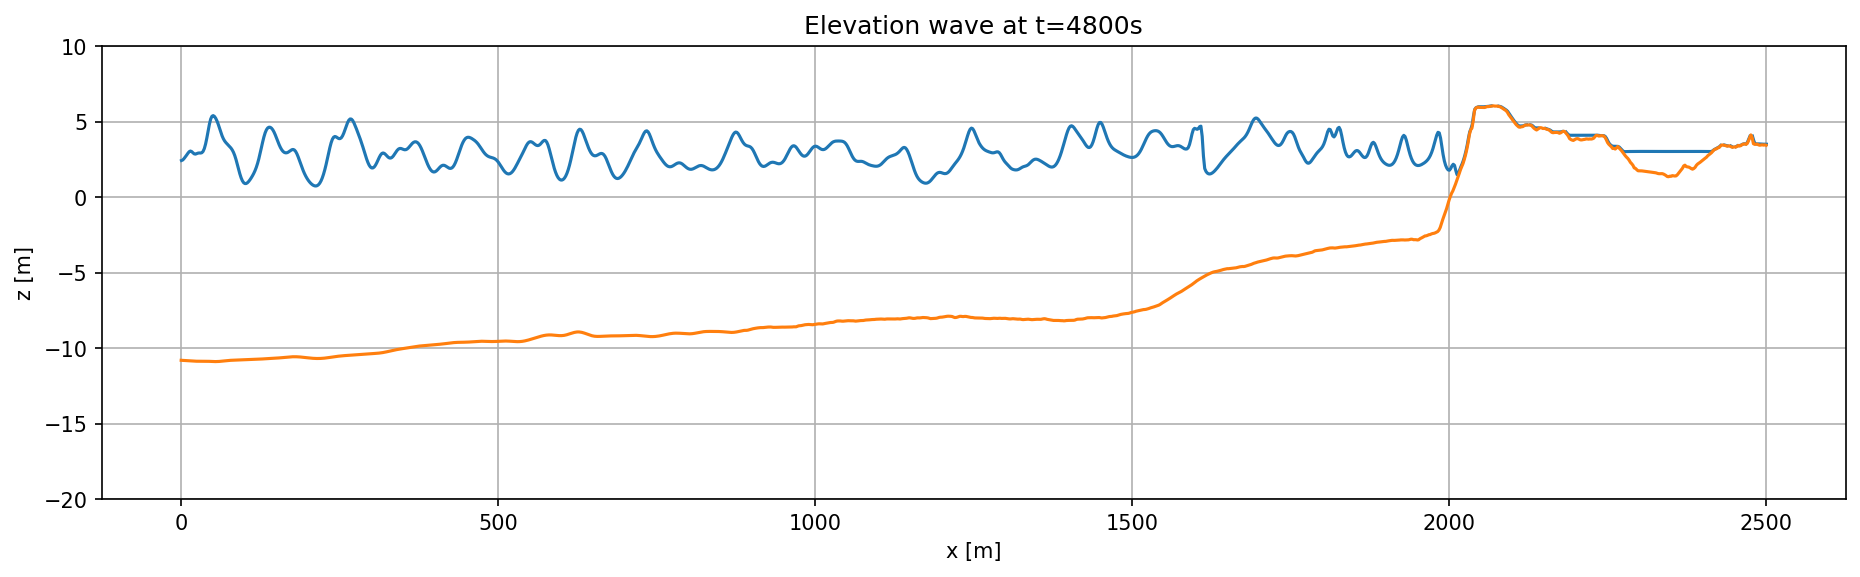

In [51]:
t0 = time.time()

for i in range(n_):
    if (sum([t_fil == (i/fac_)*dt_min][0]) == 0):# Go to frame closest to right time step
        t_i = np.argmax(t_fil == np.max(t_fil[(t_fil < (i/fac_)*dt_min + t_fil[0] + 1)]))
        plot_f(i,t_i,save,plot,ylim=[-18,10])
        plt.close()
    else: # Frame is right time stepp
        t_i = np.argmax(t_fil == (i/fac_)) # might be an error in here
        plot_f(i,t_i,save,plot,ylim=[-20,10])
        plt.close()
    print('plot time left: ' + str(int(((time.time() - t0) / ((i+1)/n_) - (time.time() - t0))/60)) + 'min.', end='\r')

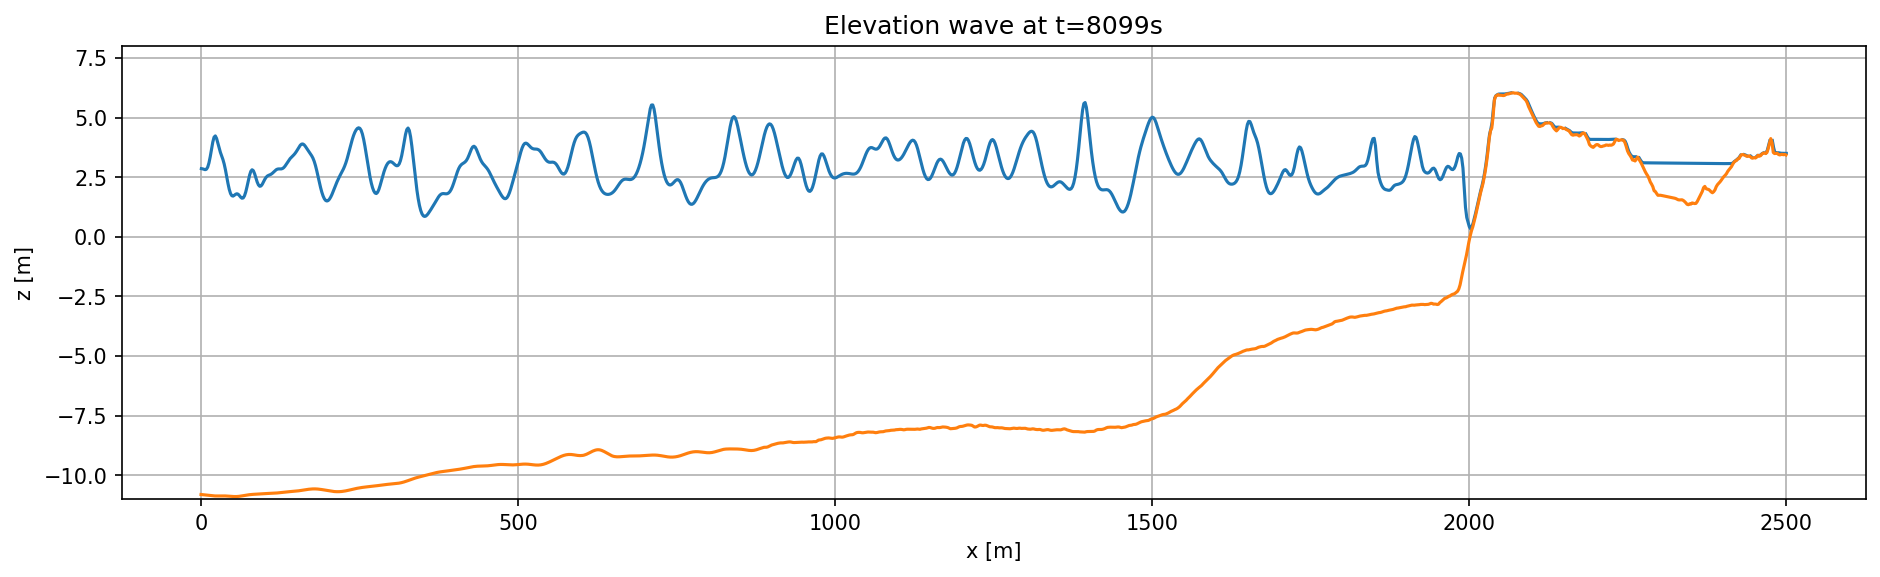

In [52]:
plot_f(i,-2,save,plot)

# New method using animations

KeyboardInterrupt: 

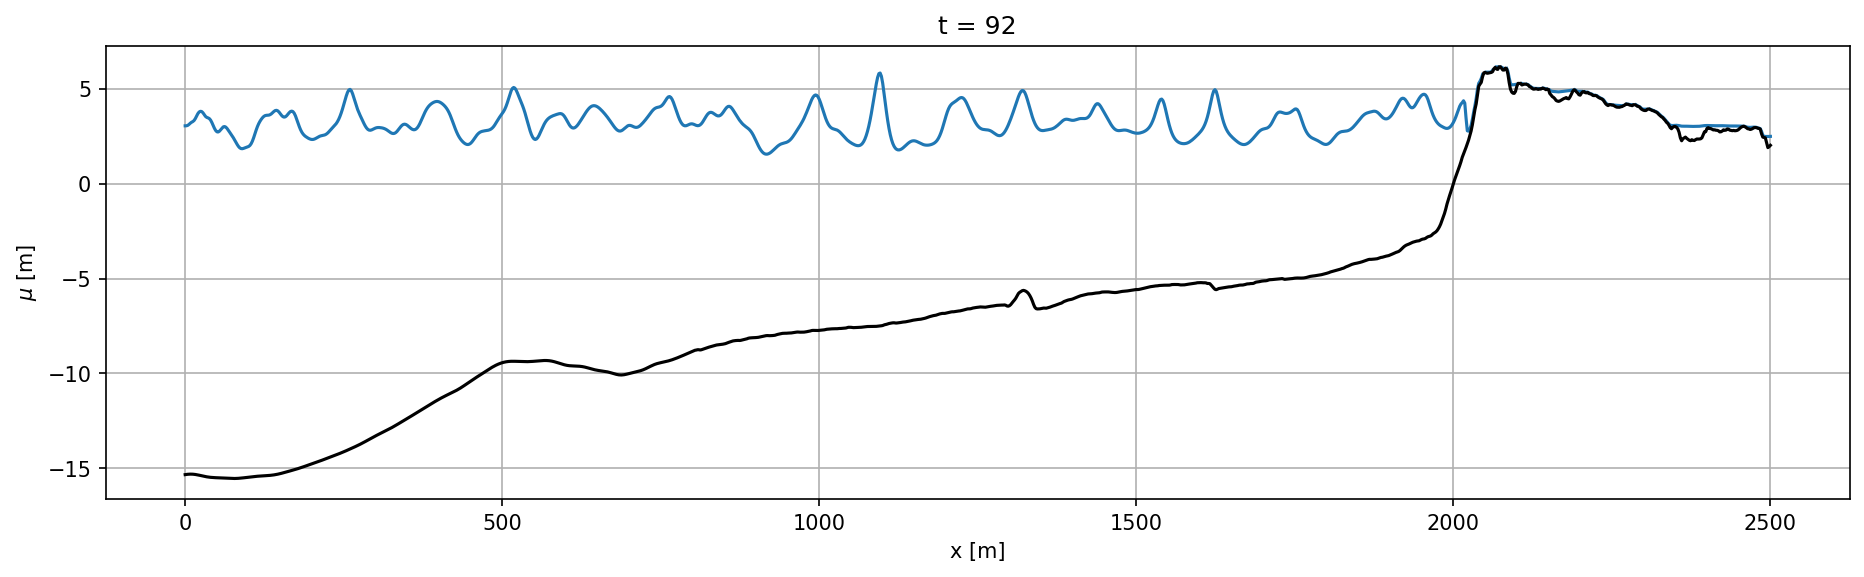

In [19]:
plt.rcParams["animation.html"] = "html5"
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig, ax = plt.subplots(figsize=[15,4])

x = np.arange(0, 2*np.pi, 0.01)

i = 0
h = np.asarray(df1.Watlev.iloc[i*(dyinp+1):(i+1)*(dyinp+1)],float)
h[h < -50] = np.nan
line, = ax.plot(np.arange(len(h))*2,h)
x_ = np.asarray(df1.Xp.iloc[:dyinp+1],float)
plt.plot(x_,b,'black')
plt.grid()
plt.xlabel("x [m]")
plt.ylabel('$\mu$ [m]')

def animate(i):
    h = np.asarray(df1.Watlev.iloc[(i+1)*(dyinp+1):(i+2)*(dyinp+1)],float)
    h[h < -50] = np.nan
    line.set_ydata(h)  # update the data.
    plt.title('t = '+str(i))
    print(str(round(i/save_count*100,1))+'%', end='\r')
    return line,

save_count = 3600
ani = animation.FuncAnimation(
    fig, animate, interval=10, blit=True, save_count=save_count)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

ani

(1250.0, 2150.0, -7.0, 7.0)

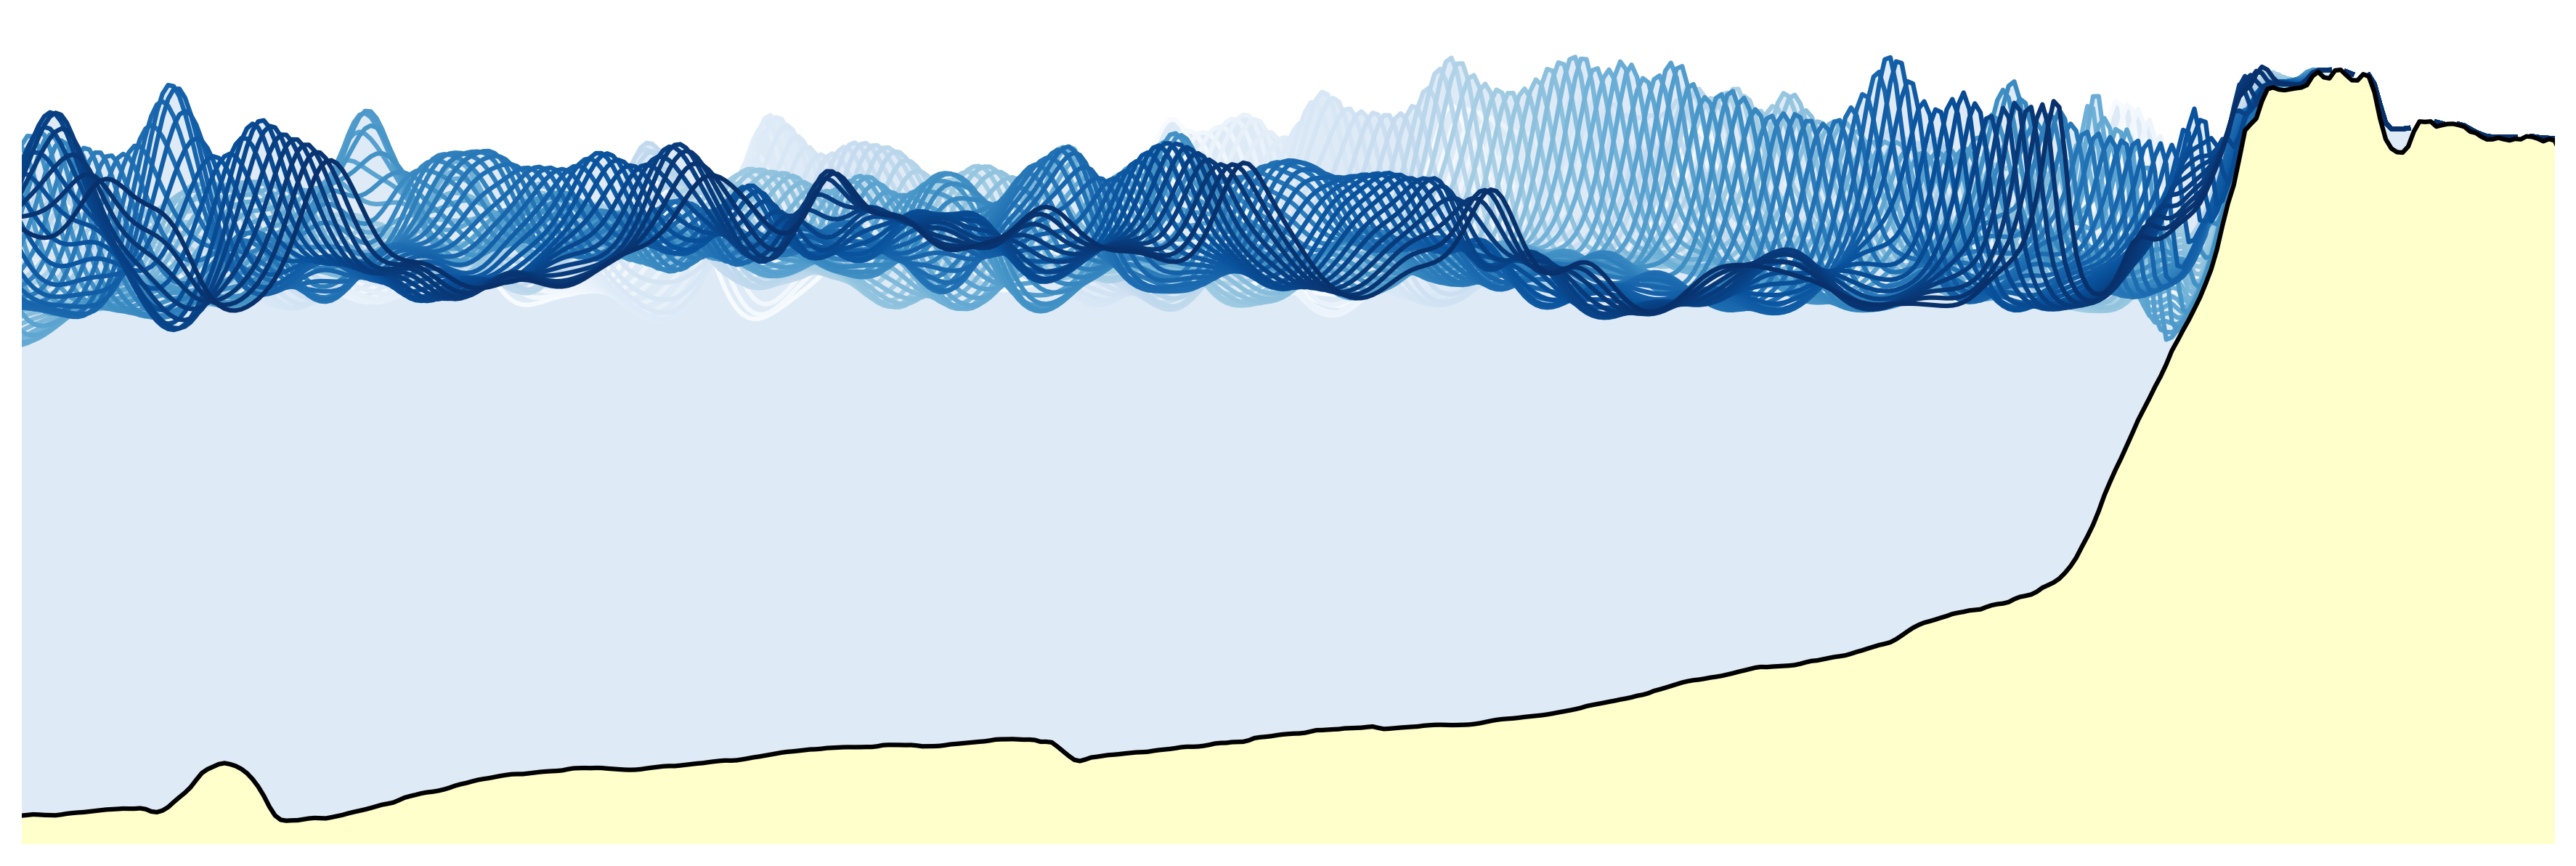

In [151]:
start = 3100-15
n = 70

plt.figure(figsize=[15,5])#, sharex=True)

cmap = plt.get_cmap('Blues',n)
for i in range(start,start+n):
    plt.plot(np.arange(len(h))*2,np.asarray(df1.Watlev.iloc[(i+1)*(dyinp+1):(i+2)*(dyinp+1)],float),color=cmap(i-start))
    plt.fill_between(np.arange(len(h))*2,np.asarray(df1.Watlev.iloc[(i+1)*(dyinp+1):(i+2)*(dyinp+1)],float),-7,color=plt.get_cmap('Blues',9)(1))
# plt.grid()
# plt.ylabel('Water depth [$m$]')
# plt.xlabel('Distance from coupling point [$m$]')
plt.ylim(-7, 7)
plt.xlim(1250,2150)
plt.fill_between(x_,b,-7,color=plt.get_cmap('Pastel1',9)(5))
plt.plot(x_,b,'k')
plt.axis('off')

In [45]:
cmap[4]

IndexError: tuple index out of range